In [1]:
import numpy as np
import pandas as pd

yield_df = pd.read_csv('yield_rainfall_merged.csv')
yield_df    

,State_Name,Crop_Year,Season,Crop,tonnes/hectare_yield,rainfall_mm
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1.594896,1565.40
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,0.500000,1565.40
2,Andaman and Nicobar Islands,2000,Kharif,Rice,3.147059,1565.40
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,3.642045,2763.20
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,0.229167,2763.20
...,...,...,...,...,...,...
245210,West Bengal,2014,Summer,Rice,2.617647,769.75
245211,West Bengal,2014,Summer,Sesamum,0.738437,769.75
245212,West Bengal,2014,Whole Year,Sugarcane,50.154321,2422.70
245213,West Bengal,2014,Winter,Rice,2.141848,61.05


In [2]:
yield_df.isnull().sum()

State_Name                 0
Crop_Year                  0
Season                     0
Crop                       0
tonnes/hectare_yield    3726
rainfall_mm             1171
dtype: int64

In [3]:
yield_df.dropna(inplace = True)

In [4]:
yield_df.isnull().sum()

State_Name              0
Crop_Year               0
Season                  0
Crop                    0
tonnes/hectare_yield    0
rainfall_mm             0
dtype: int64

In [5]:
yield_df.groupby('Crop').count()

,State_Name,Crop_Year,Season,tonnes/hectare_yield,rainfall_mm
Crop,,,,,
Apple,4,4,4,4,4
Arcanut (Processed),20,20,20,20,20
Arecanut,1506,1506,1506,1506,1506
Arhar/Tur,7476,7476,7476,7476,7476
Ash Gourd,44,44,44,44,44
...,...,...,...,...,...
Wheat,7819,7819,7819,7819,7819
Yam,36,36,36,36,36
other fibres,10,10,10,10,10


In [7]:
max_rain = yield_df['rainfall_mm'].max()
min_rain = yield_df['rainfall_mm'].min()
print('Max_rain = ', max_rain)
print('Min_rain = ', min_rain)

Max_rain =  6229.2
Min_rain =  0.0


In [9]:
yield_df['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [6]:
yield_df.describe()

,Crop_Year,tonnes/hectare_yield,rainfall_mm
count,240323.000000,240323.000000,240323.000000
mean,2005.619508,39.204104,1021.123925
std,4.952495,799.805763,1173.891465
min,1997.000000,0.000000,0.000000
25%,2002.000000,0.513158,174.700000
50%,2006.000000,1.000000,773.700000
75%,2010.000000,2.341753,1316.000000
max,2015.000000,88000.000000,6229.200000


In [7]:
yield_df['State_Name'].nunique()

32

In [8]:
yield_df['Crop'].nunique()

124

The dataframe has 32 States, ordering these by 10 the highest yield production: 

In [9]:
yield_df.groupby(['State_Name'],sort=True)['tonnes/hectare_yield'].sum().nlargest(10)

State_Name
Assam                          2.173275e+06
Andhra Pradesh                 1.865720e+06
Kerala                         1.526233e+06
Punjab                         1.086707e+06
Tamil Nadu                     8.661052e+05
Telangana                      5.658708e+05
West Bengal                    5.118542e+05
Uttar Pradesh                  1.753920e+05
Karnataka                      8.867782e+04
Andaman and Nicobar Islands    6.905418e+04
Name: tonnes/hectare_yield, dtype: float64

In [10]:
yield_df.groupby(['Crop','State_Name'],sort=True)['tonnes/hectare_yield'].sum().nlargest(10)

Crop       State_Name                 
Coconut    Assam                          2.118070e+06
           Andhra Pradesh                 1.806520e+06
           Kerala                         1.497896e+06
Sugarcane  Punjab                         1.080660e+06
Coconut    Tamil Nadu                     7.139919e+05
           Telangana                      5.390737e+05
           West Bengal                    4.637929e+05
Sugarcane  Tamil Nadu                     7.872587e+04
Coconut    Andaman and Nicobar Islands    6.832828e+04
Sugarcane  Uttar Pradesh                  6.689664e+04
Name: tonnes/hectare_yield, dtype: float64

In [11]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

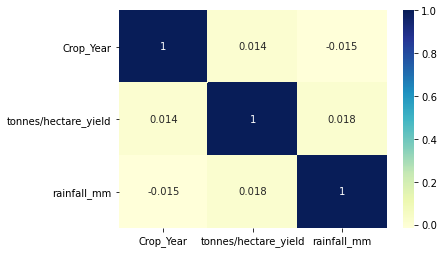

In [12]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()
dataplot = sns.heatmap(correlation_data, cmap="YlGnBu", annot=True)

It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe.

In [13]:
yield_df.head()

,State_Name,Crop_Year,Season,Crop,tonnes/hectare_yield,rainfall_mm
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1.594896,1565.4
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,0.500000,1565.4
2,Andaman and Nicobar Islands,2000,Kharif,Rice,3.147059,1565.4
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,3.642045,2763.2
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,0.229167,2763.2


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['State_Name',"Crop", "Season"], prefix = ['State',"Crop","Season"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'tonnes/hectare_yield']
label=yield_df['tonnes/hectare_yield']
features.head()

,Crop_Year,rainfall_mm,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,...,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,2000,1565.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2000,1565.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2000,1565.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2000,2763.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2000,2763.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
features = features.drop(['Crop_Year'], axis=1)

In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240323 entries, 0 to 245214
Columns: 163 entries, rainfall_mm to Season_Winter
dtypes: float64(1), uint8(162)
memory usage: 40.8 MB


In [18]:
features.head()

,rainfall_mm,State_Andaman and Nicobar Islands,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,State_Dadra and Nagar Haveli,State_Goa,...,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,1565.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1565.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1565.4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2763.2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2763.2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [20]:
features

array([[0.25130033, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25130033, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25130033, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.38892635, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00980062, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.00980062, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [21]:
#test-train split
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [22]:
#Model Comparison & Selection
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
#     svm.SVR(),
    DecisionTreeRegressor()
]

In [24]:
model_train=list(map(compare_models,models)) 

In [25]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.9112774204934756]
['RandomForestRegressor', 0.7789212258256166]
['DecisionTreeRegressor', 0.9234809199591256]
